In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("mysore.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,PS,WS50M
0,2011,6,1,5,22.48,93.75,0.04,92.55,1.58
1,2011,6,1,6,22.87,91.75,0.03,92.62,2.77
2,2011,6,1,7,23.65,87.94,0.04,92.71,4.29
3,2011,6,1,8,24.71,82.19,0.07,92.78,6.12
4,2011,6,1,9,25.75,76.12,0.15,92.80,7.53
...,...,...,...,...,...,...,...,...,...
86203,2021,4,1,0,26.73,53.19,0.00,92.66,6.74
86204,2021,4,1,1,25.81,60.38,0.00,92.63,6.83
86205,2021,4,1,2,24.81,68.38,0.00,92.64,6.64
86206,2021,4,1,3,23.98,75.75,0.00,92.67,6.09


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS50M']


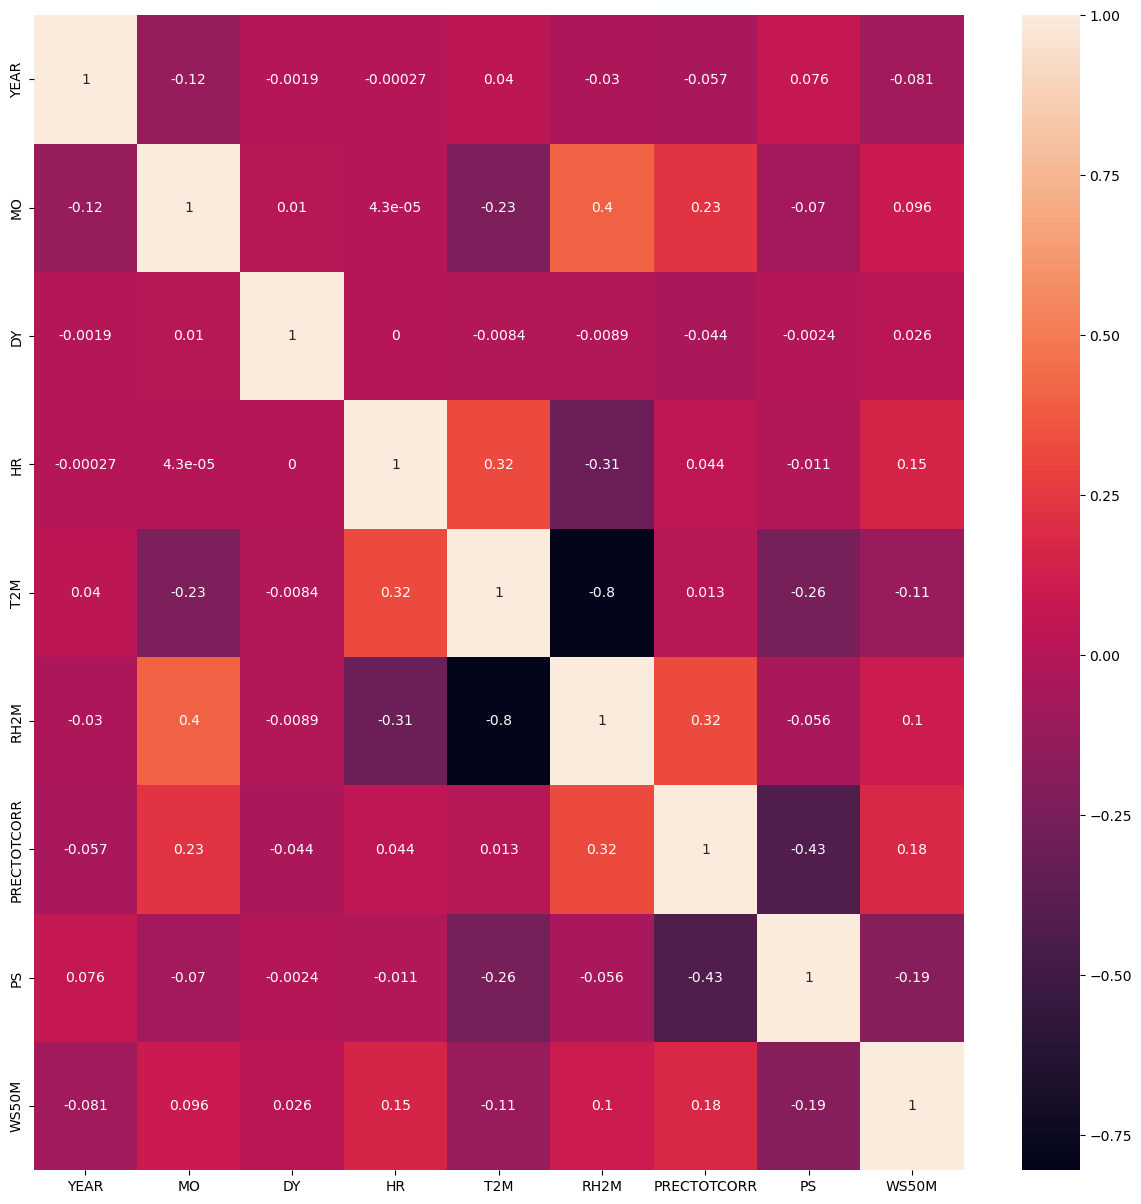

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

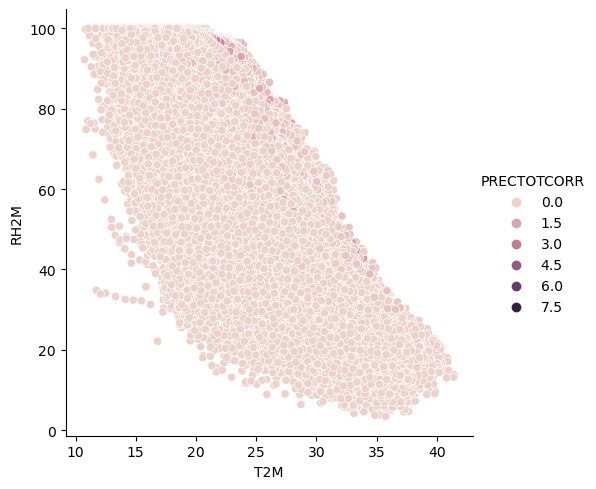

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


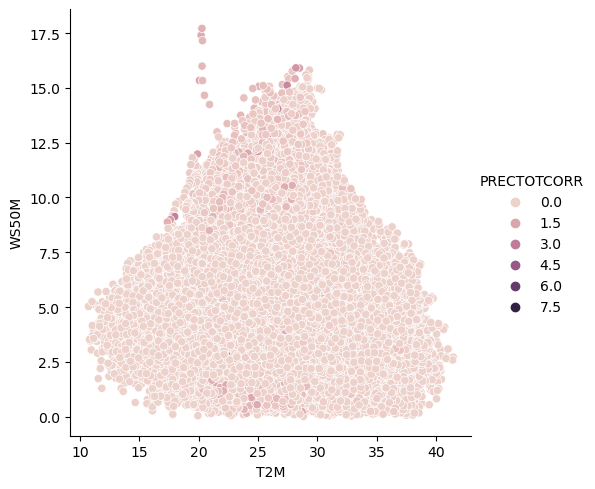

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


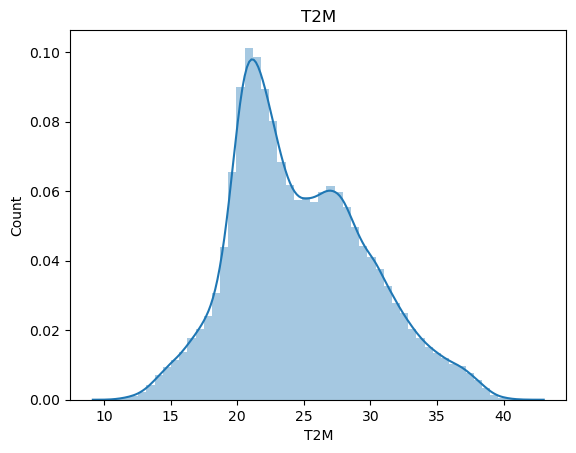

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


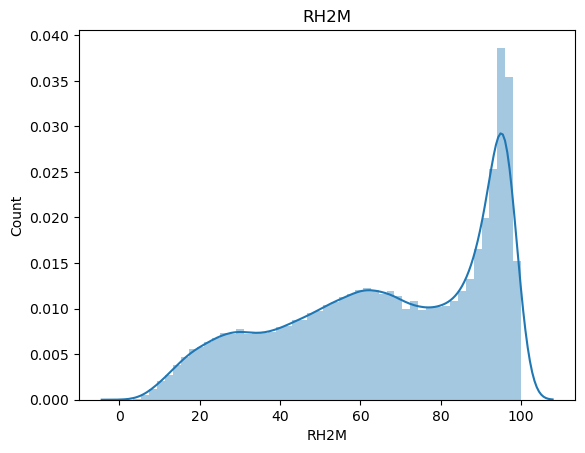

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


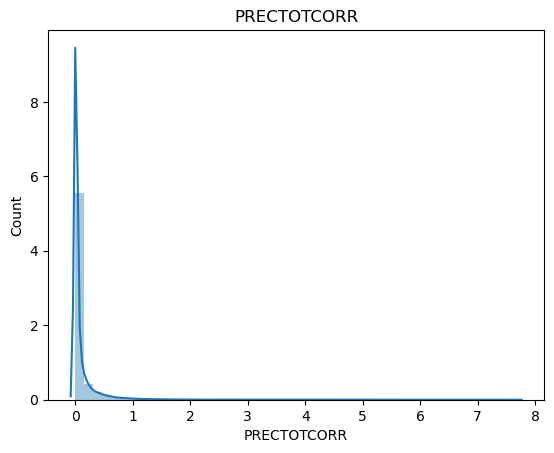

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


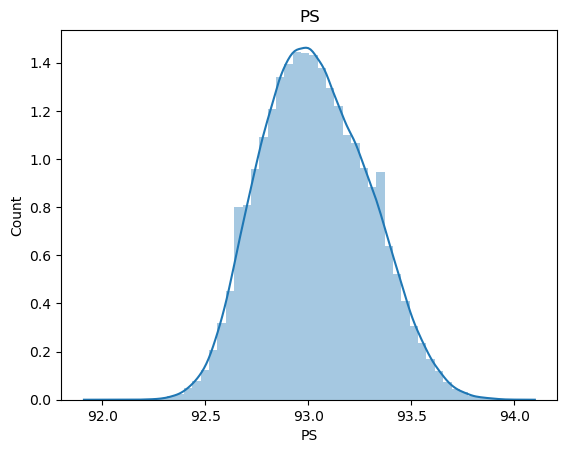

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


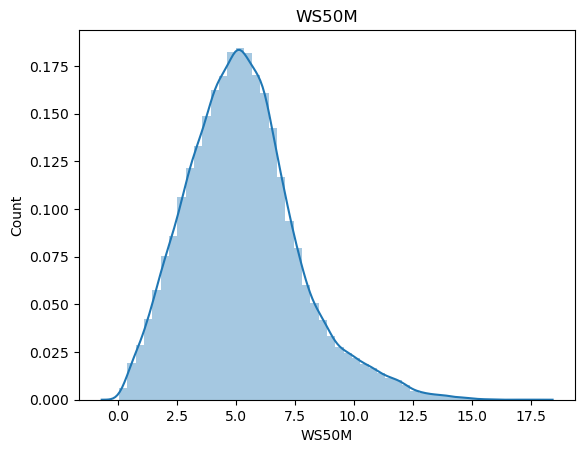

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

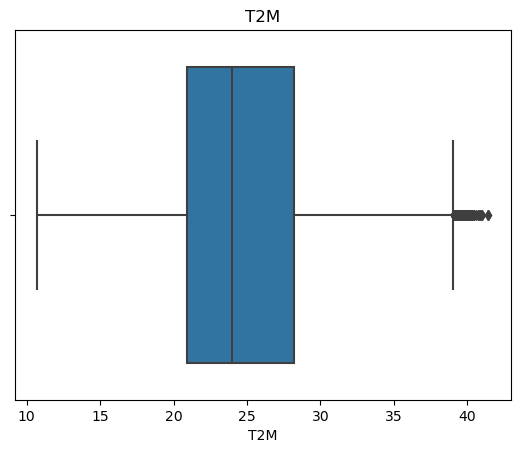

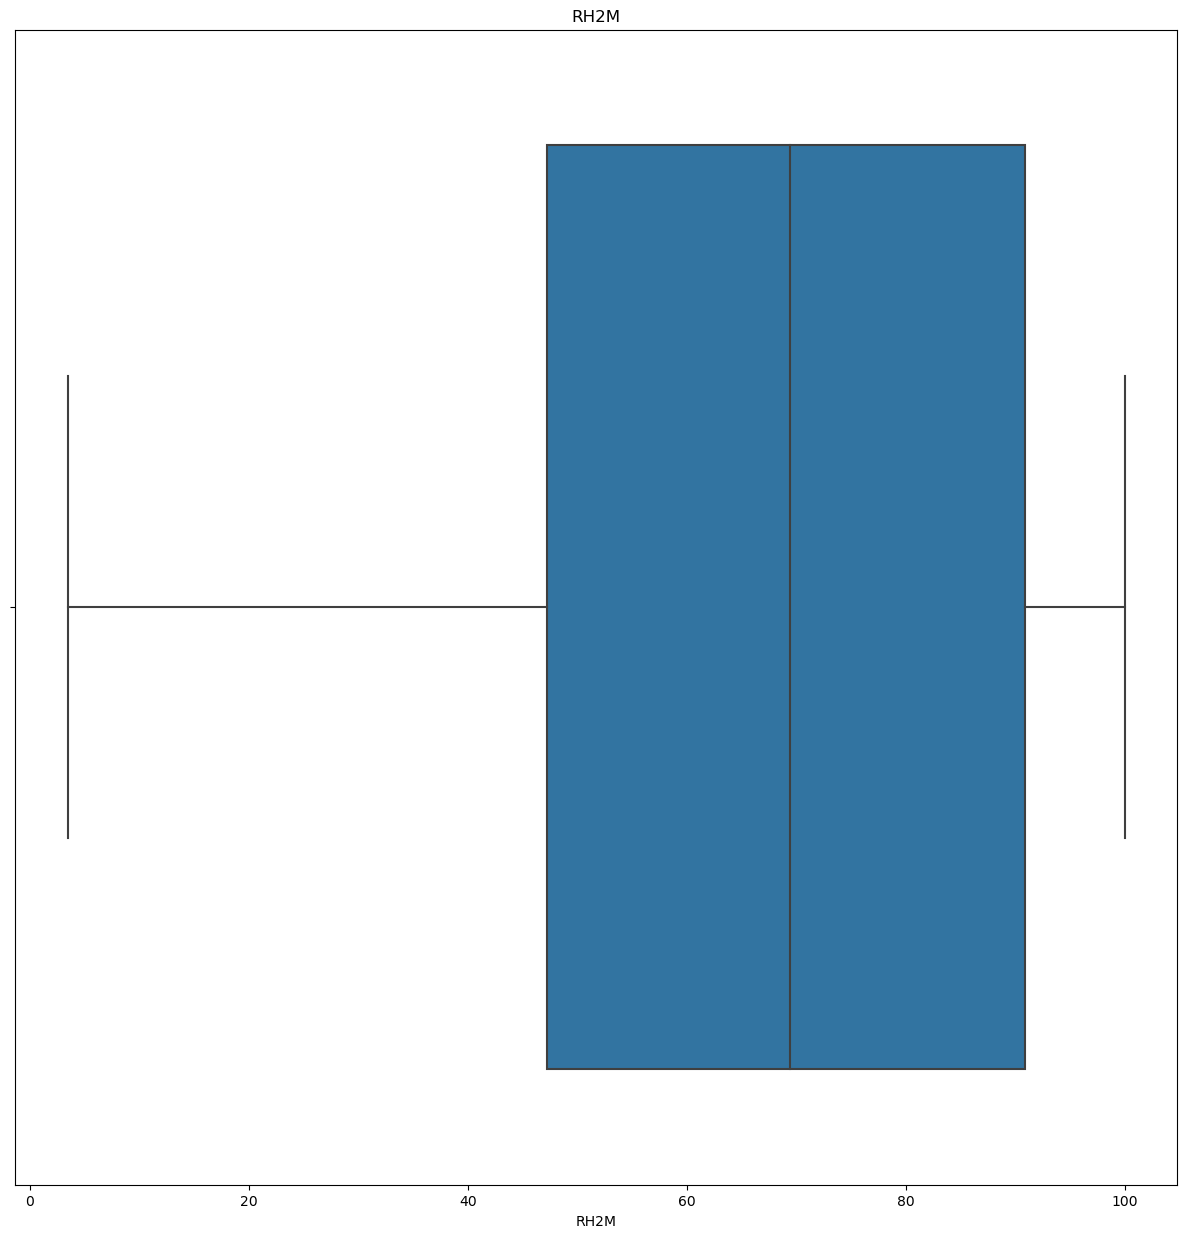

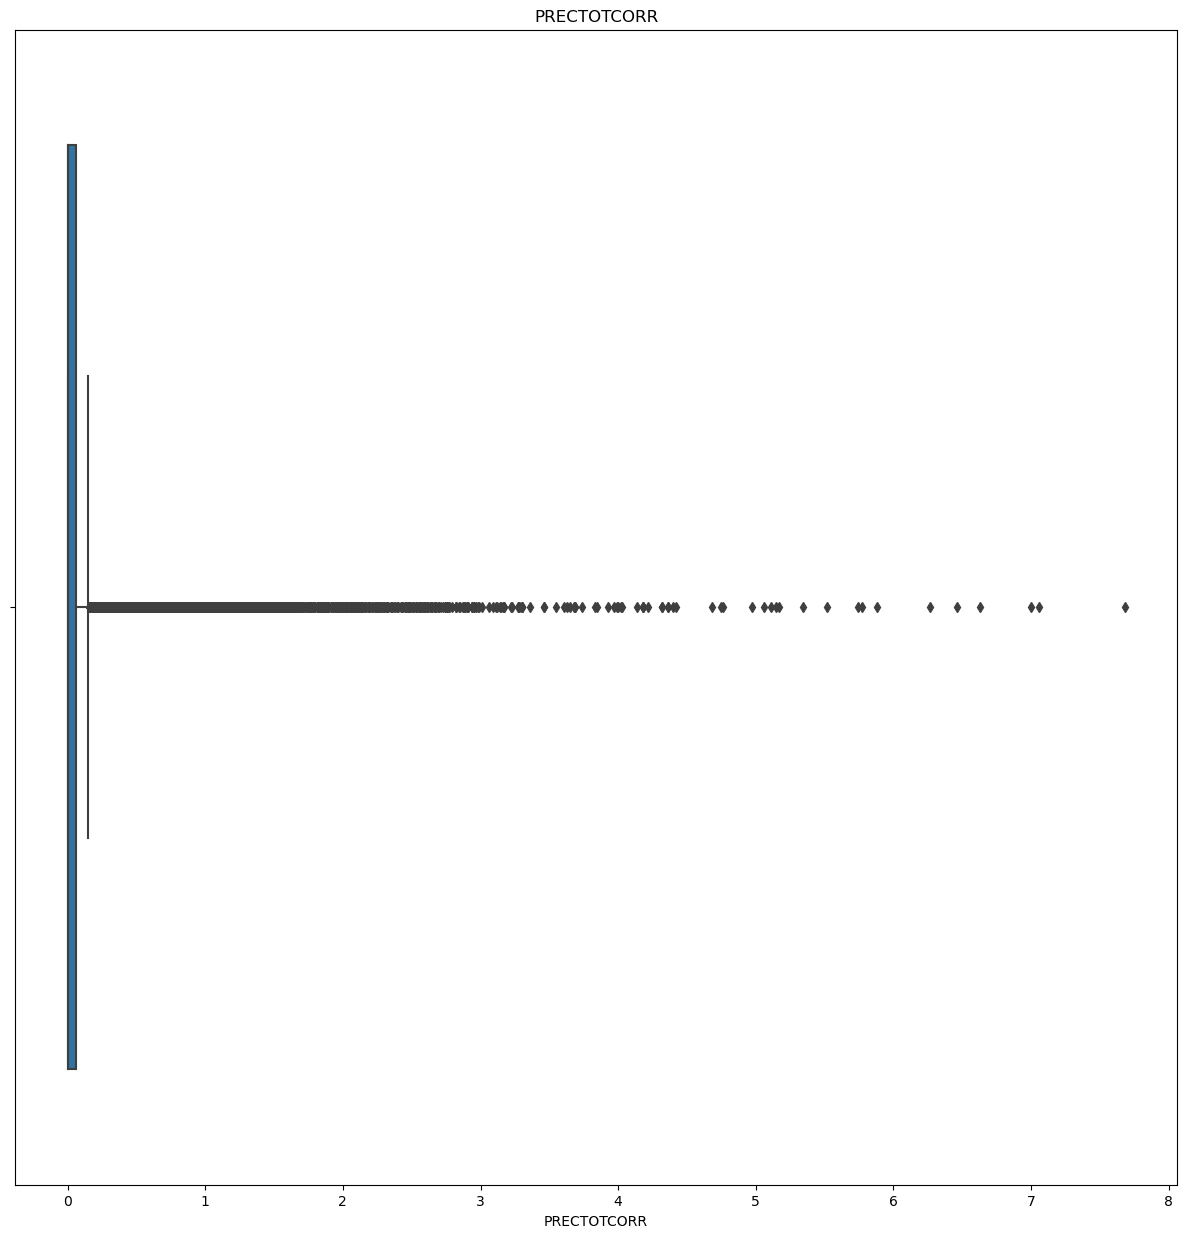

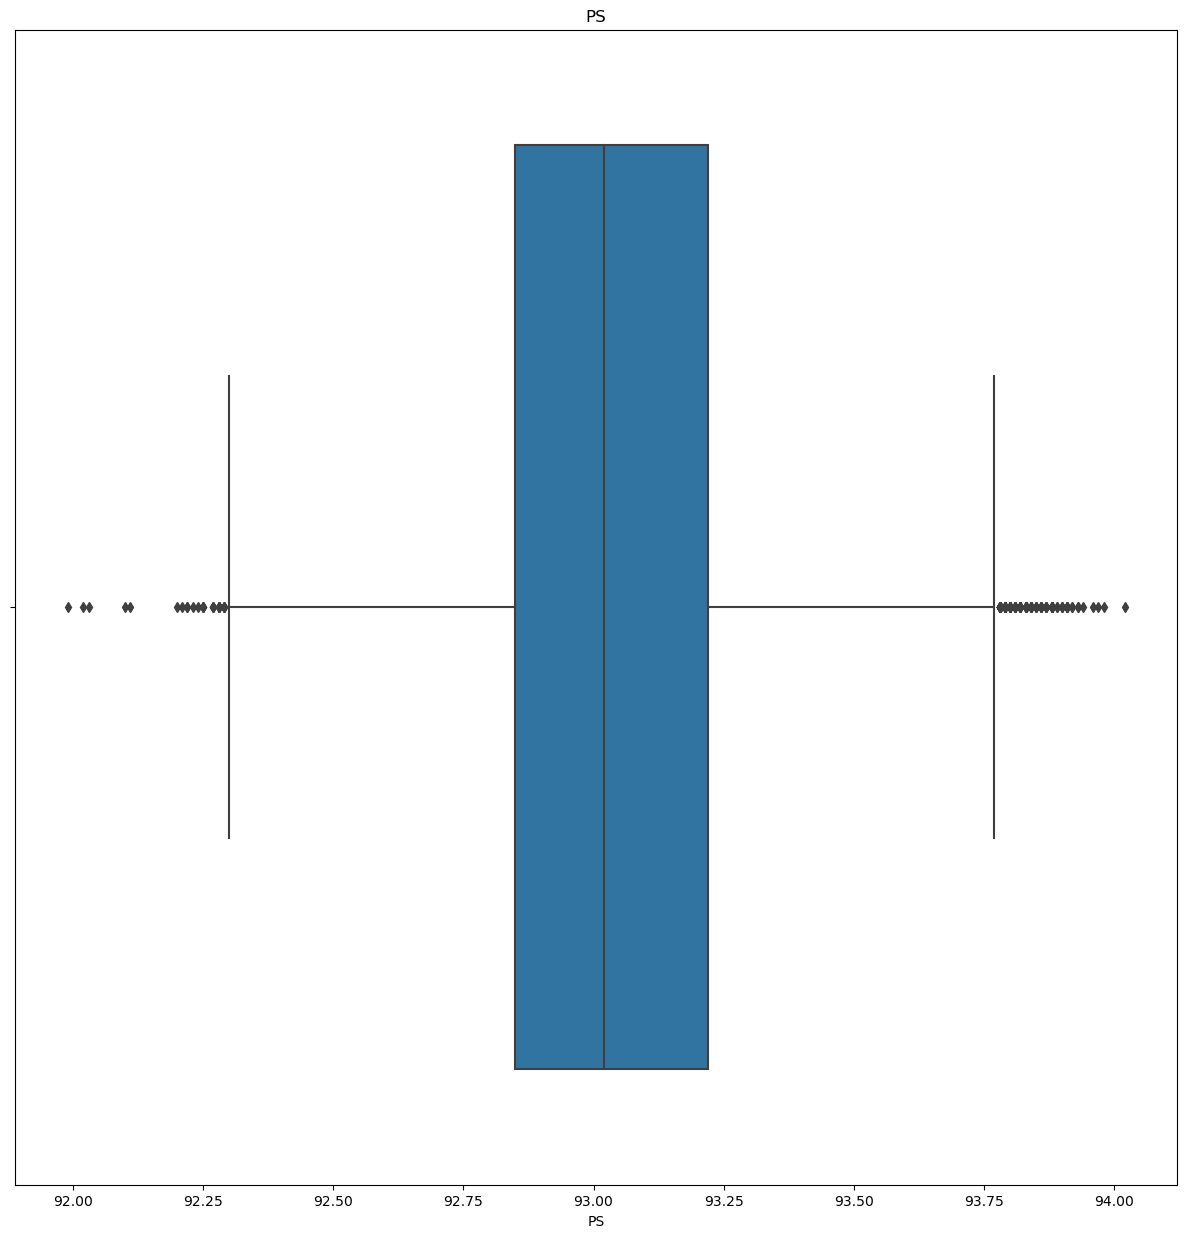

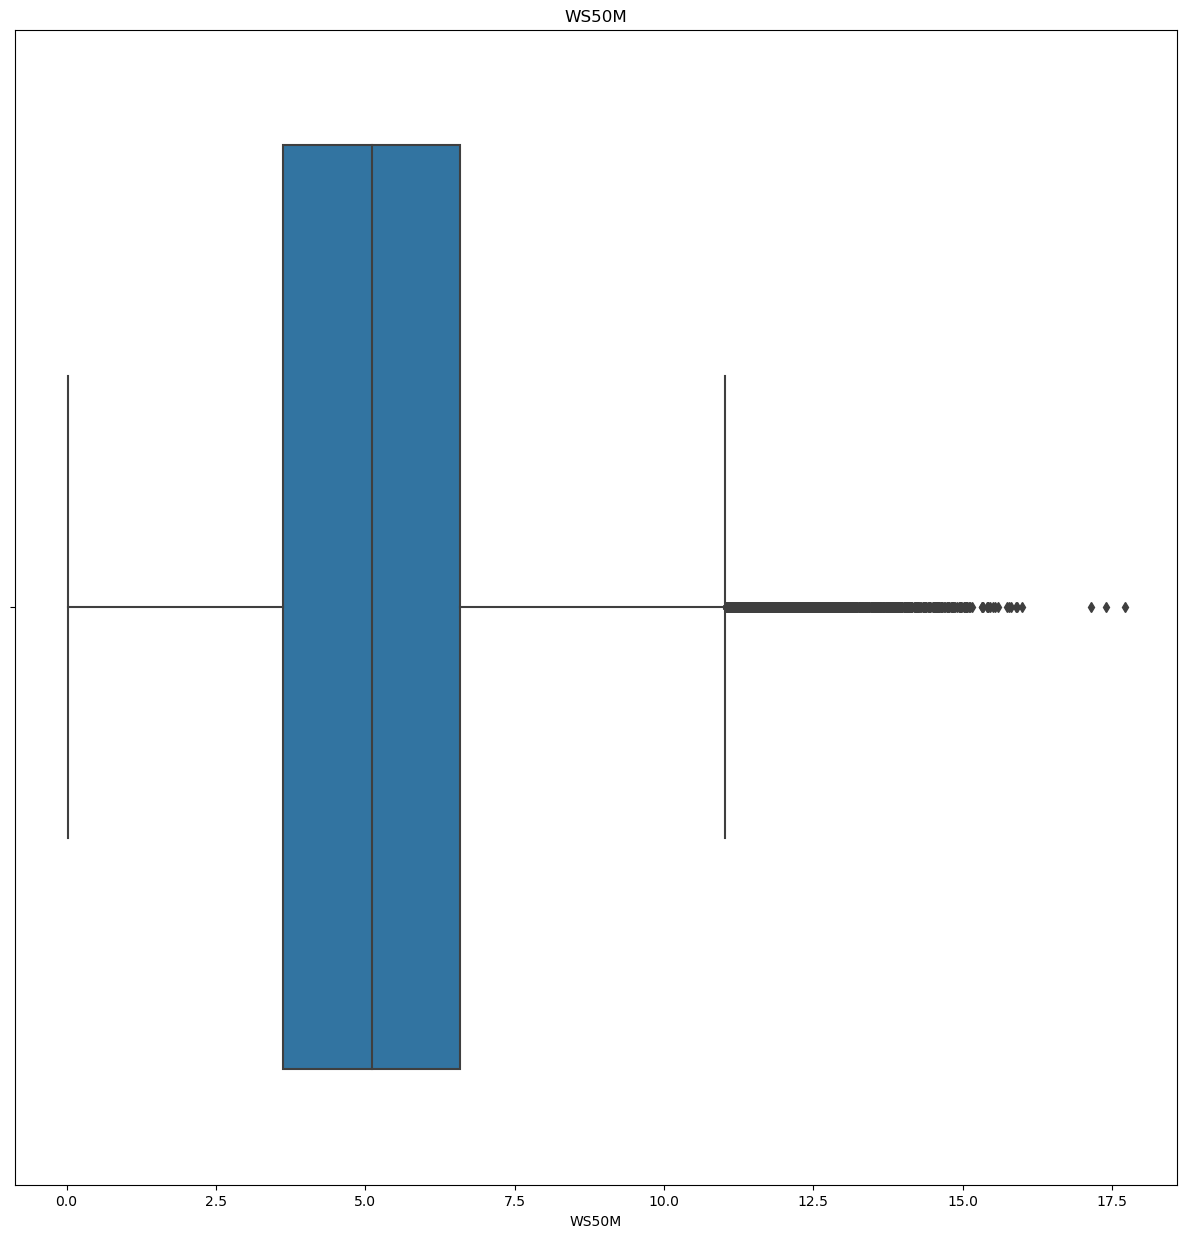

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[22.48 22.87 23.65 ... 12.17 40.24 39.55]
<class 'numpy.ndarray'>
[0.04 0.03 0.07 0.15 0.3  0.47 0.59 0.55 0.48 0.41 0.38 0.4  0.33 0.22
 0.16 0.14 0.11 0.06 0.12 0.18 0.23 0.32 0.35 0.36 0.31 0.25 0.19 0.1
 0.08 0.05 0.21 0.2  0.09 0.02 0.13 0.44 0.61 0.62 0.42 0.24 0.26 0.01
 0.46 0.52 0.28 0.17 0.34 0.27 0.   0.37 0.58 0.8  1.05 0.92 0.68 0.29
 0.39 2.47 1.03 1.85 0.85 1.23 0.82 0.45 0.78 0.91 1.07 0.99 0.6  0.67
 0.49 0.57 1.15 1.14 0.75 0.66 0.87 0.54 0.53 0.5  0.43 0.71 0.76 0.98
 0.65 0.51 0.64 1.27 1.69 1.93 1.6  0.83 1.01 1.21 1.18 1.06 0.69 0.56
 1.1  0.95 1.4  0.63 1.38 1.33 1.09 0.74 0.93 0.72 1.13 1.37 1.49 1.43
 0.7  0.73 1.02 0.79 0.97 1.75 1.46 0.88 1.7  1.45 1.08 0.94 1.19 0.9
 0.77 1.12 1.2  1.11 1.26 1.41 1.61 1.62 1.55 1.42 1.28 0.81 0.86 1.17
 1.04 1.51 1.54 1.32 0.89 0.84 1.   1.16 1.5  0.96 1.36 1.64 1.63 1.98
 2.04 1.35 1.29 1.44 1.24 1.83 1.25 1.31 3.12 1.59 2.08 2.58 2.85 3.3
 3.23 2.35 2.32 1.82 1.58 2.12 2.49 2.25 1.99 1.97 1.84 1.47 1.39 2.64
 4.18 6.63 7.6

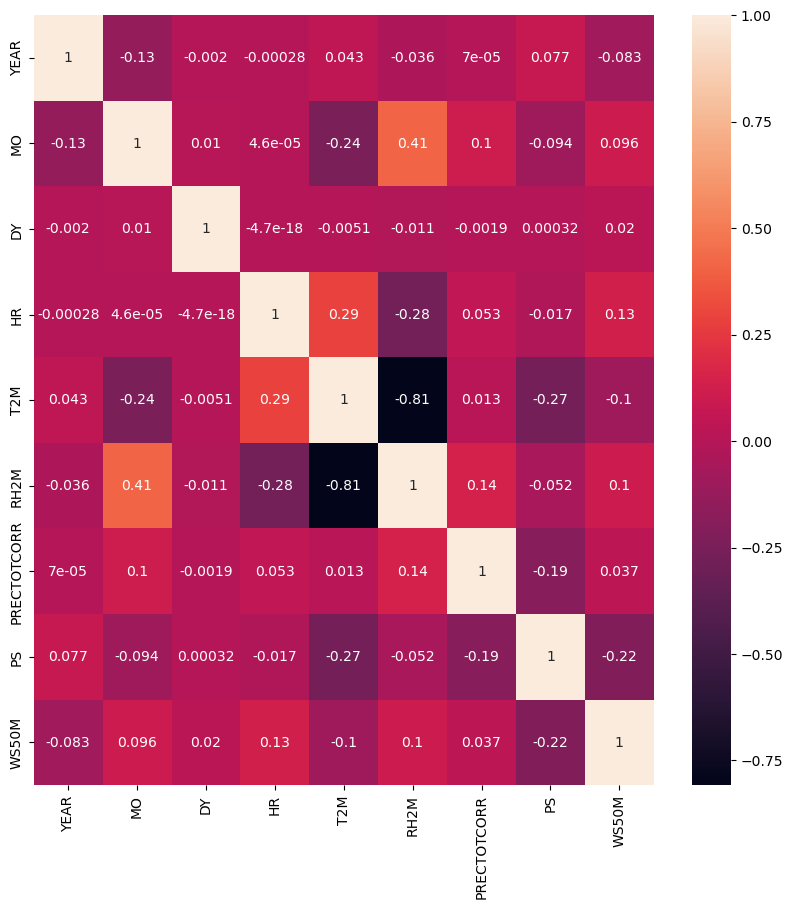

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


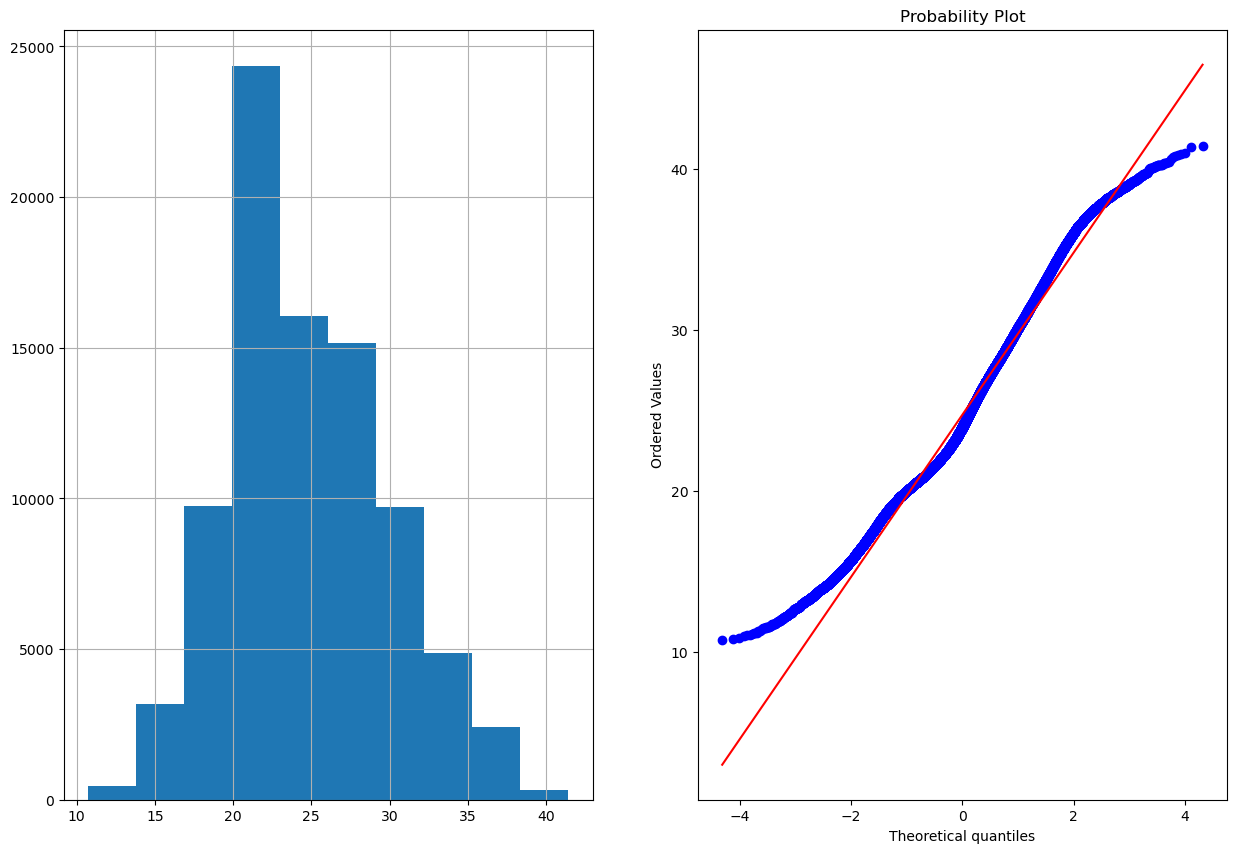

RH2M


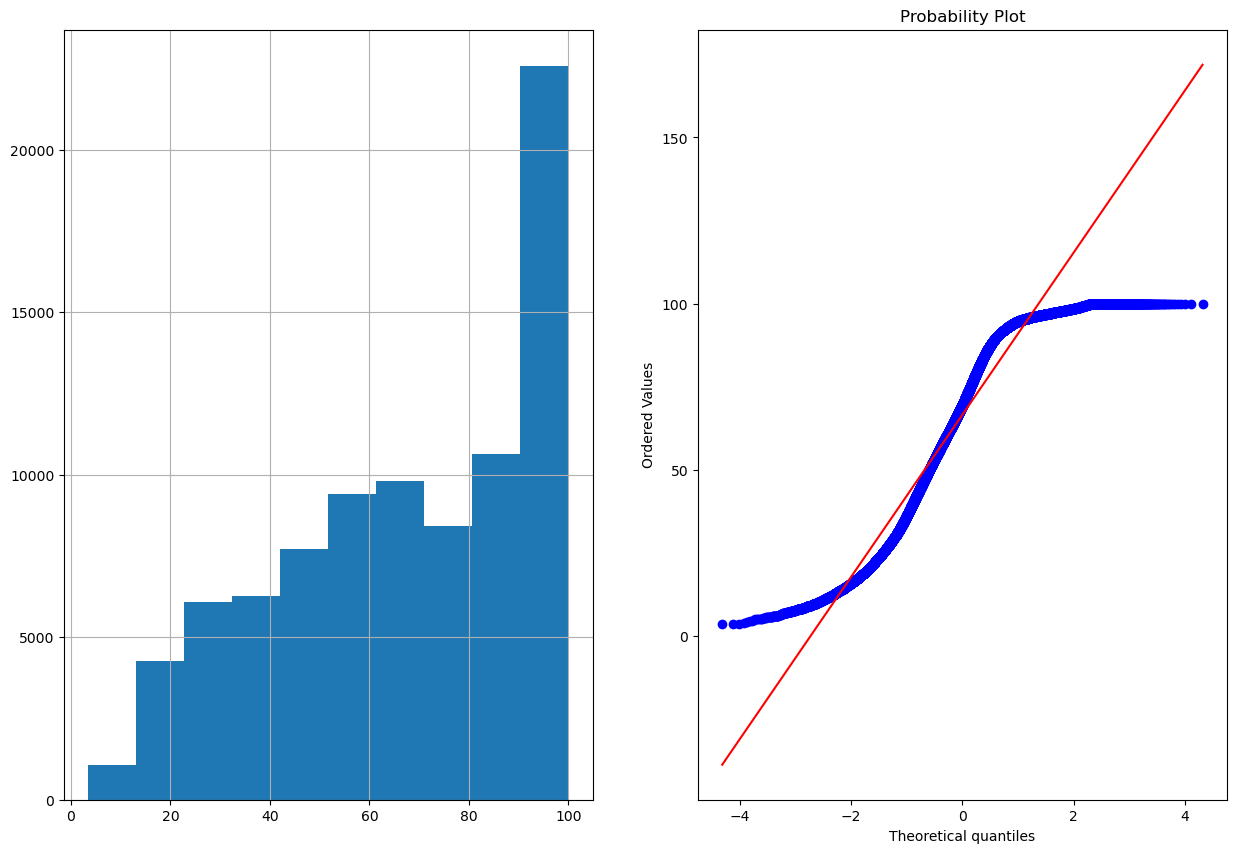

PRECTOTCORR


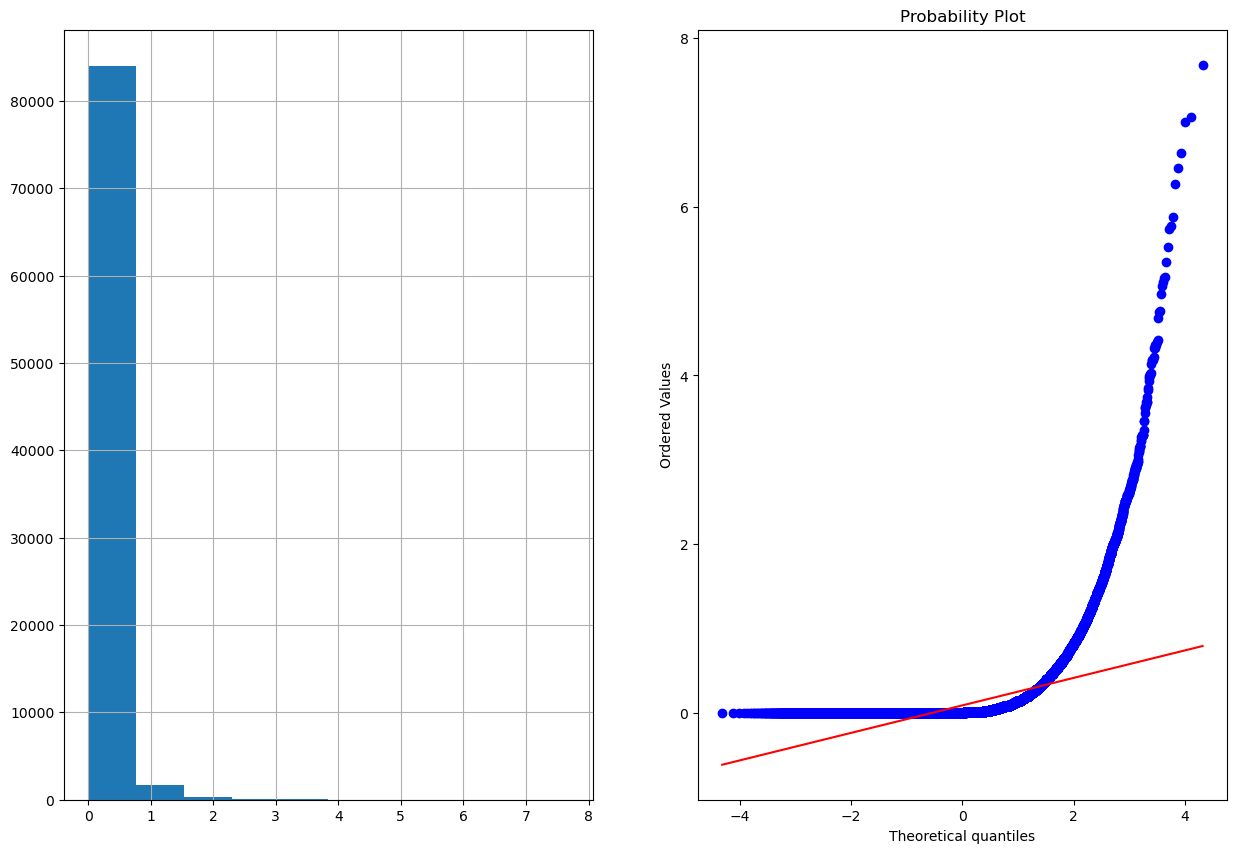

PS


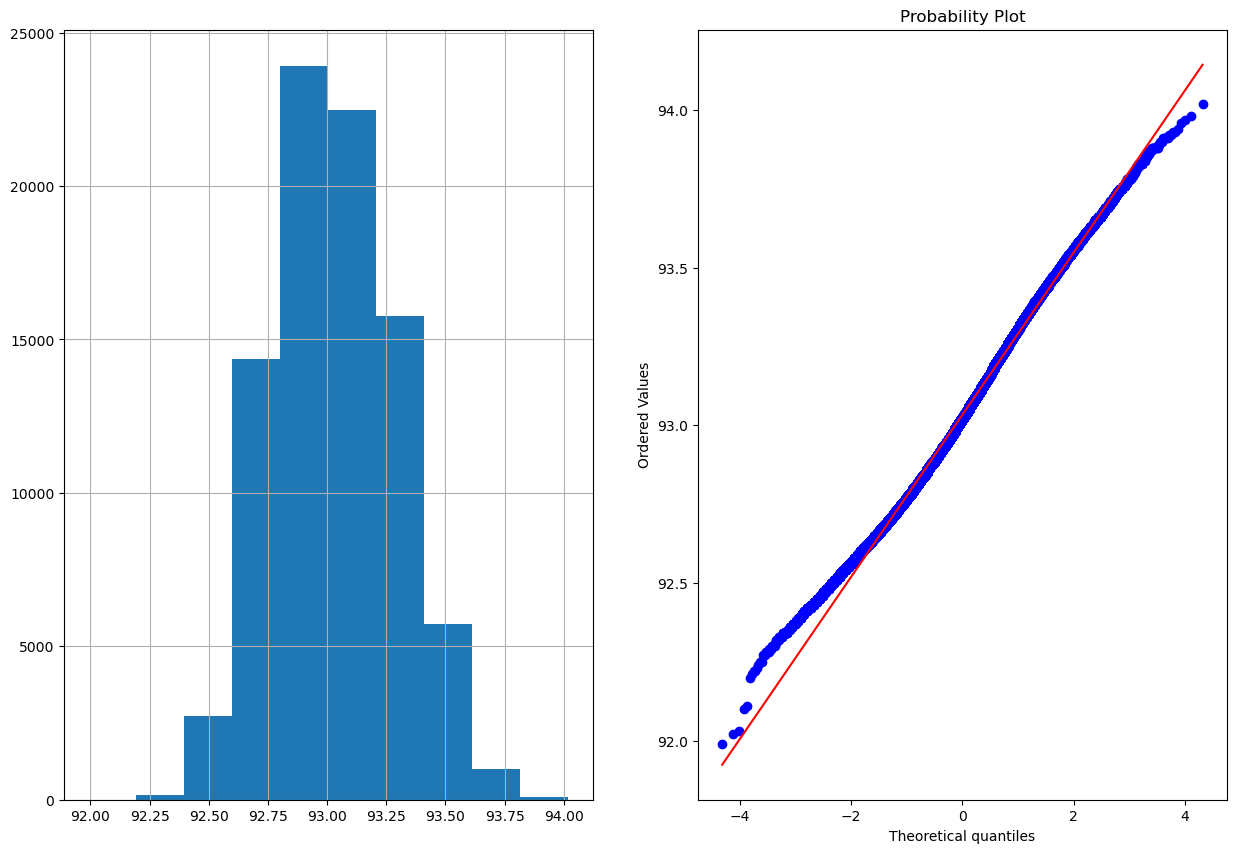

WS50M


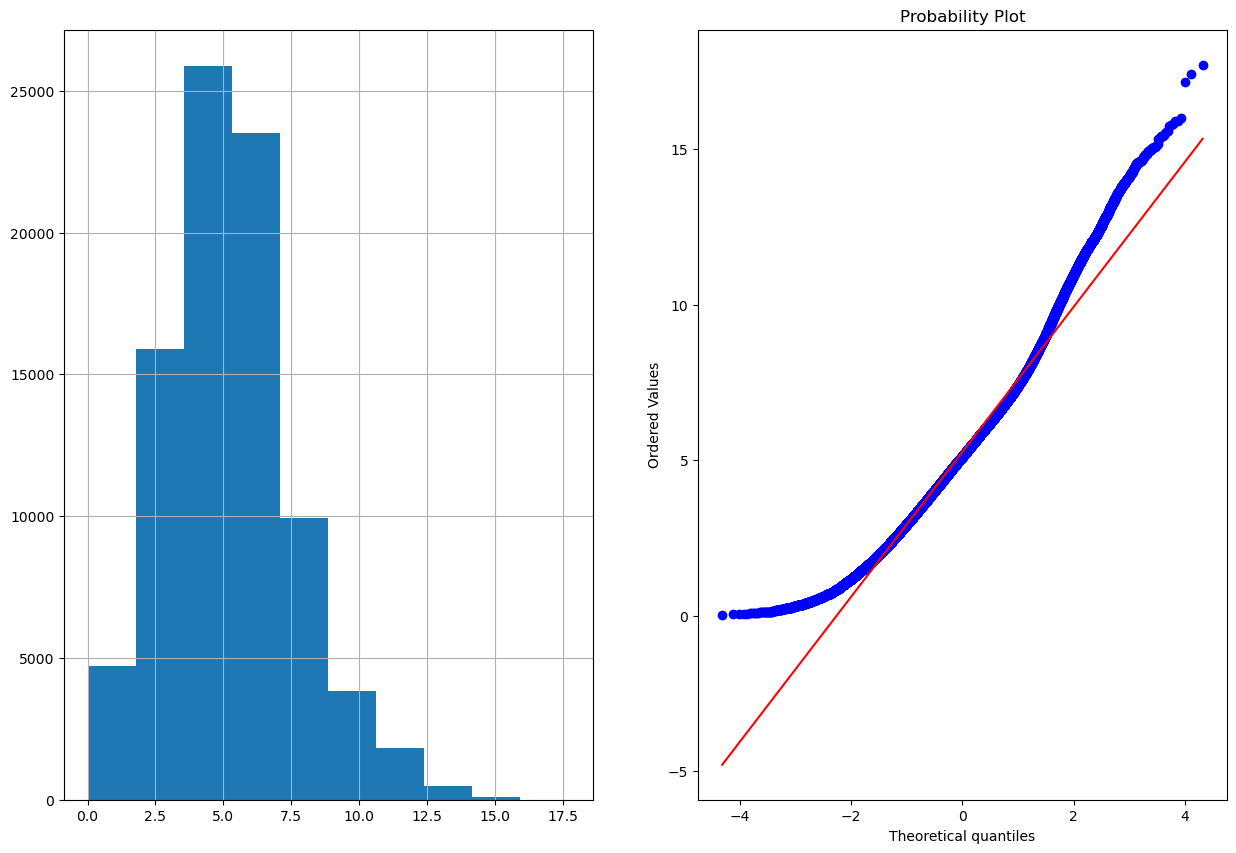

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.04, 0.03, 0.07, 0.15, 0.3 , 0.47, 0.59, 0.55, 0.48, 0.41, 0.38,
       0.4 , 0.33, 0.22, 0.16, 0.14, 0.11, 0.06, 0.12, 0.18, 0.23, 0.32,
       0.35, 0.36, 0.31, 0.25, 0.19, 0.1 , 0.08, 0.05, 0.21, 0.2 , 0.09,
       0.02, 0.13, 0.44, 0.61, 0.62, 0.42, 0.24, 0.26, 0.01, 0.46, 0.52,
       0.28, 0.17, 0.34, 0.27, 0.  , 0.37, 0.58, 0.8 , 1.05, 0.92, 0.68,
       0.29, 0.39, 2.47, 1.03, 1.85, 0.85, 1.23, 0.82, 0.45, 0.78, 0.91,
       1.07, 0.99, 0.6 , 0.67, 0.49, 0.57, 1.15, 1.14, 0.75, 0.66, 0.87,
       0.54, 0.53, 0.5 , 0.43, 0.71, 0.76, 0.98, 0.65, 0.51, 0.64, 1.27,
       1.69, 1.93, 1.6 , 0.83, 1.01, 1.21, 1.18, 1.06, 0.69, 0.56, 1.1 ,
       0.95, 1.4 , 0.63, 1.38, 1.33, 1.09, 0.74, 0.93, 0.72, 1.13, 1.37,
       1.49, 1.43, 0.7 , 0.73, 1.02, 0.79, 0.97, 1.75, 1.46, 0.88, 1.7 ,
       1.45, 1.08, 0.94, 1.19, 0.9 , 0.77, 1.12, 1.2 , 1.11, 1.26, 1.41,
       1.61, 1.62, 1.55, 1.42, 1.28, 0.81, 0.86, 1.17, 1.04, 1.51, 1.54,
       1.32, 0.89, 0.84, 1.  , 1.16, 1.5 , 0.96, 1.

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([0., 1.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,22.48,0.0
1,22.87,0.0
2,23.65,0.0
3,24.71,0.0
4,25.75,0.0
...,...,...
86203,26.73,1.0
86204,25.81,1.0
86205,24.81,1.0
86206,23.98,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,22.48,0.0,5
1,22.87,0.0,6
2,23.65,0.0,7
3,24.71,0.0,8
4,25.75,0.0,9
...,...,...,...
86203,26.73,1.0,0
86204,25.81,1.0,1
86205,24.81,1.0,2
86206,23.98,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,22.48,0.0,5,1
1,22.87,0.0,6,1
2,23.65,0.0,7,1
3,24.71,0.0,8,1
4,25.75,0.0,9,1
...,...,...,...,...
86203,26.73,1.0,0,1
86204,25.81,1.0,1,1
86205,24.81,1.0,2,1
86206,23.98,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,22.48,0.0,5,1,6
1,22.87,0.0,6,1,6
2,23.65,0.0,7,1,6
3,24.71,0.0,8,1,6
4,25.75,0.0,9,1,6
...,...,...,...,...,...
86203,26.73,1.0,0,1,4
86204,25.81,1.0,1,1,4
86205,24.81,1.0,2,1,4
86206,23.98,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,22.48,0.0,5,1,6,2011
1,22.87,0.0,6,1,6,2011
2,23.65,0.0,7,1,6,2011
3,24.71,0.0,8,1,6,2011
4,25.75,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,26.73,1.0,0,1,4,2021
86204,25.81,1.0,1,1,4,2021
86205,24.81,1.0,2,1,4,2021
86206,23.98,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,22.48,0.0,5,1,6,2011
1,22.87,0.0,6,1,6,2011
2,23.65,0.0,7,1,6,2011
3,24.71,0.0,8,1,6,2011
4,25.75,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,26.73,1.0,0,1,4,2021
86204,25.81,1.0,1,1,4,2021
86205,24.81,1.0,2,1,4,2021
86206,23.98,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([0., 1.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,22.48,0.0,5,1,6,2011,93.75
1,22.87,0.0,6,1,6,2011,91.75
2,23.65,0.0,7,1,6,2011,87.94
3,24.71,0.0,8,1,6,2011,82.19
4,25.75,0.0,9,1,6,2011,76.12
...,...,...,...,...,...,...,...
86203,26.73,1.0,0,1,4,2021,53.19
86204,25.81,1.0,1,1,4,2021,60.38
86205,24.81,1.0,2,1,4,2021,68.38
86206,23.98,1.0,3,1,4,2021,75.75


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,22.48,0.0,5,1,6,2011,93.75,1.58
1,22.87,0.0,6,1,6,2011,91.75,2.77
2,23.65,0.0,7,1,6,2011,87.94,4.29
3,24.71,0.0,8,1,6,2011,82.19,6.12
4,25.75,0.0,9,1,6,2011,76.12,7.53
...,...,...,...,...,...,...,...,...
86203,26.73,1.0,0,1,4,2021,53.19,6.74
86204,25.81,1.0,1,1,4,2021,60.38,6.83
86205,24.81,1.0,2,1,4,2021,68.38,6.64
86206,23.98,1.0,3,1,4,2021,75.75,6.09


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,22.48,0.0,5,1,6,2011,93.75,1.58,1.58
1,22.87,0.0,6,1,6,2011,91.75,2.77,2.77
2,23.65,0.0,7,1,6,2011,87.94,4.29,4.29
3,24.71,0.0,8,1,6,2011,82.19,6.12,6.12
4,25.75,0.0,9,1,6,2011,76.12,7.53,7.53
...,...,...,...,...,...,...,...,...,...
86203,26.73,1.0,0,1,4,2021,53.19,6.74,6.74
86204,25.81,1.0,1,1,4,2021,60.38,6.83,6.83
86205,24.81,1.0,2,1,4,2021,68.38,6.64,6.64
86206,23.98,1.0,3,1,4,2021,75.75,6.09,6.09


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

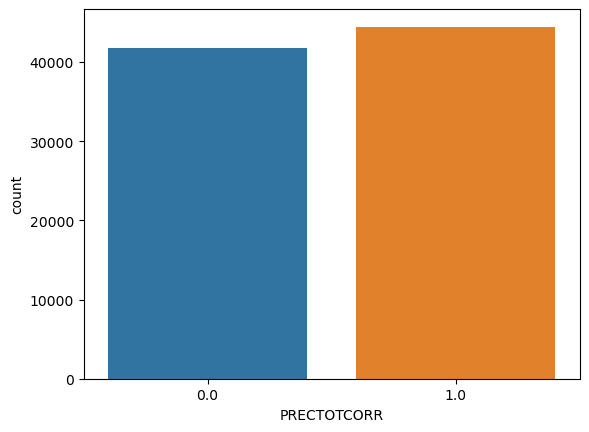

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("mysore-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,22.48,0.0,5,1,6,2011,93.75,1.58,1.58
1,22.87,0.0,6,1,6,2011,91.75,2.77,2.77
2,23.65,0.0,7,1,6,2011,87.94,4.29,4.29
3,24.71,0.0,8,1,6,2011,82.19,6.12,6.12
4,25.75,0.0,9,1,6,2011,76.12,7.53,7.53
...,...,...,...,...,...,...,...,...,...
86203,26.73,1.0,0,1,4,2021,53.19,6.74,6.74
86204,25.81,1.0,1,1,4,2021,60.38,6.83,6.83
86205,24.81,1.0,2,1,4,2021,68.38,6.64,6.64
86206,23.98,1.0,3,1,4,2021,75.75,6.09,6.09
